In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# how to read data in google sheet
sheet_url = 'https://docs.google.com/spreadsheets/d/1M7duWIz7R-plhQ8l9RH51jhW6SuCJHvA/edit#gid=1797760921'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=') # convert editable spreadsheet csv
print(sheet_url_trf)

df = pd.read_csv(sheet_url_trf)
df.head()

https://docs.google.com/spreadsheets/d/1M7duWIz7R-plhQ8l9RH51jhW6SuCJHvA/export?format=csv&gid=1797760921


,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,NaN,12/1/2017,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,11/1/2011,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,5/1/2012,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,NaN,11/1/2006,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,NaN,5/1/2011,Action-adventure,Re-Logic,Re-Logic


In [ ]:
# info tabel (info kolom, baris, dll)
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       177 non-null    object 
 1   Sales      177 non-null    float64
 2   Series     141 non-null    object 
 3   Release    177 non-null    object 
 4   Genre      177 non-null    object 
 5   Developer  177 non-null    object 
 6   Publisher  177 non-null    object 
dtypes: float64(1), object(6)
memory usage: 9.8+ KB


Index(['Name', 'Sales', 'Series', 'Release', 'Genre', 'Developer',
       'Publisher'],
      dtype='object')

In [ ]:
# change type date
df_clean = df.copy() # ngecopy data df biar ada back up sbg frame asli (opsional)
df_clean['Release'] = pd.to_datetime(df_clean['Release']) # function pd.to_datetime untuk ubah text jadi tanggal

print(df_clean.info())
df_clean.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Name       177 non-null    object        
 1   Sales      177 non-null    float64       
 2   Series     141 non-null    object        
 3   Release    177 non-null    datetime64[ns]
 4   Genre      177 non-null    object        
 5   Developer  177 non-null    object        
 6   Publisher  177 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 9.8+ KB
None


,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,NaN,2017-12-01,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,2011-11-01,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,2012-05-01,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,NaN,2006-11-01,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,NaN,2011-05-01,Action-adventure,Re-Logic,Re-Logic


In [ ]:
#count value series

df_clean['Series'].value_counts().head() # tambahan .head() munculin 5 data teratas

StarCraft            6
Command & Conquer    5
Civilization         4
Age of Empires       4
Warcraft             3
Name: Series, dtype: int64

In [ ]:
# check blank data di setiap kolom
df_clean.isnull().sum()

Name          0
Sales         0
Series       36
Release       0
Genre         0
Developer     0
Publisher     0
dtype: int64

In [ ]:
# count blank data di kolom 'Series'
df_clean['Series'].isnull().sum()

36

# Top 5 publisher and Developer




In [ ]:
for col_name in ['Developer', 'Publisher'] :
  print(df_clean[col_name].value_counts().head(), '\n') # tambahan .head() munculin 5 data teratas

Blizzard Entertainment        10
Maxis                          6
Paradox Development Studio     5
id Software                    4
Westwood Studios               4
Name: Developer, dtype: int64 

Electronic Arts           19
Blizzard Entertainment    10
Paradox Interactive        7
Activision                 6
GT Interactive             5
Name: Publisher, dtype: int64 



[Text(0, 0, '19'),
 Text(0, 0, '10'),
 Text(0, 0, '7'),
 Text(0, 0, '6'),
 Text(0, 0, '5')]

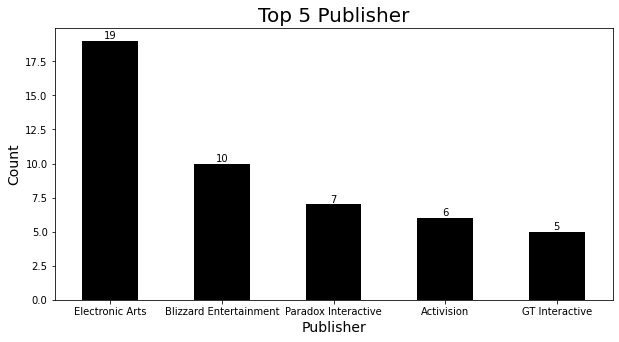

In [ ]:
plt.rcParams['figure.figsize'] = (10,5)
fig_pub = df_clean['Publisher'].value_counts().head().plot(kind='bar', color='black')

plt.title('Top 5 Publisher', fontsize=20)
plt.xlabel('Publisher', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation='horizontal')

fig_pub.bar_label(fig_pub.containers[0])

In [ ]:
top_pub = df_clean['Publisher'].value_counts().head()
top_pub

Electronic Arts           19
Blizzard Entertainment    10
Paradox Interactive        7
Activision                 6
GT Interactive             5
Name: Publisher, dtype: int64

[Text(0, 0, '10'),
 Text(0, 0, '6'),
 Text(0, 0, '5'),
 Text(0, 0, '4'),
 Text(0, 0, '4')]

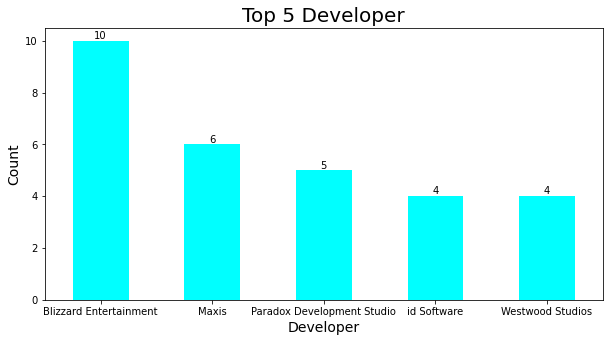

In [ ]:
top_dev = df_clean['Developer'].value_counts().head().plot(kind='bar', color = 'cyan')

plt.title('Top 5 Developer', fontsize=20)
plt.xlabel('Developer', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation='horizontal')

top_dev.bar_label(top_dev.containers[0])

In [ ]:
#Check duplicate data
df_clean['Sales'].duplicated().sum()

147

In [ ]:
df_clean['Sales'].value_counts().head()

1.0    79
2.0    33
3.0     9
4.0     7
2.5     5
Name: Sales, dtype: int64

In [ ]:
# replace blank series with NaN

df_nan=df_clean.replace(r'^\s*$', np.nan, regex=True)
df_nan.head()

,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,NaN,2017-12-01,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,2011-11-01,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,2012-05-01,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,NaN,2006-11-01,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,NaN,2011-05-01,Action-adventure,Re-Logic,Re-Logic


In [ ]:
# replace blank series with unknown
dict_blank = {'NaN' : 'Unknown'}

df_replaced = df_nan.replace(dict_blank)
df_replaced.head()

,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,Unknown,2017-12-01,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,2011-11-01,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,2012-05-01,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,Unknown,2006-11-01,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,Unknown,2011-05-01,Action-adventure,Re-Logic,Re-Logic


In [ ]:
# fill blank series with unknown
df_nan['Series'] = df_nan['Series'].fillna('Unknown')
df_nan.head()

,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,Unknown,2017-12-01,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,2011-11-01,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,2012-05-01,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,Unknown,2006-11-01,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,Unknown,2011-05-01,Action-adventure,Re-Logic,Re-Logic


In [ ]:
# how to replace string 'unknown' to blank value
dict_unknown = {'Unknown' : ''}

df_blank = df_nan.replace(dict_unknown)
df_blank.head()

,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,NaN,2017-12-01,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,2011-11-01,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,2012-05-01,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,NaN,2006-11-01,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,NaN,2011-05-01,Action-adventure,Re-Logic,Re-Logic


# Series with most sales

In [ ]:
mostsales = df_clean.groupby('Sales', as_index=False)['Series'].sum().sort_values('Sales',ascending=False)
mostsales.head(7)

,Sales,Series
29,42.0,0
28,33.0,Minecraft
27,20.0,Diablo
26,17.2,0
25,14.0,Warcraft
24,12.0,Half-LifeThe Witcher
23,11.0,StarCraftThe Sims


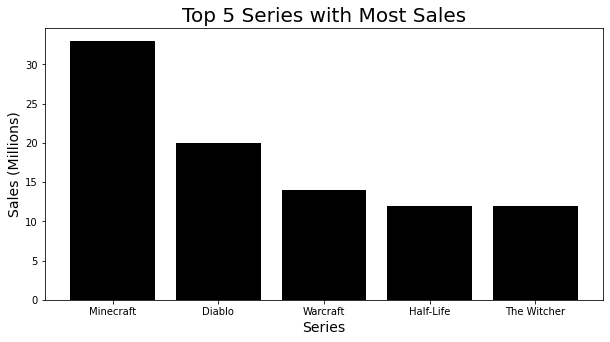

In [ ]:
topsales = {
    'Series' : ['Minecraft', 'Diablo', 'Warcraft', 'Half-Life', 'The Witcher'],
    'Sales' : [33.0, 20.0, 14.0, 12.0, 12.0]
}

plt.rcParams['figure.figsize'] = (10,5)
plt.bar('Series', 'Sales', data = topsales, color = 'black')
plt.title('Top 5 Series with Most Sales', fontsize=20)
plt.xlabel('Series', fontsize=14)
plt.ylabel('Sales (Millions)', fontsize=14)
plt.show()

[Text(0, 0, '33'),
 Text(0, 0, '20'),
 Text(0, 0, '14'),
 Text(0, 0, '12'),
 Text(0, 0, '12')]

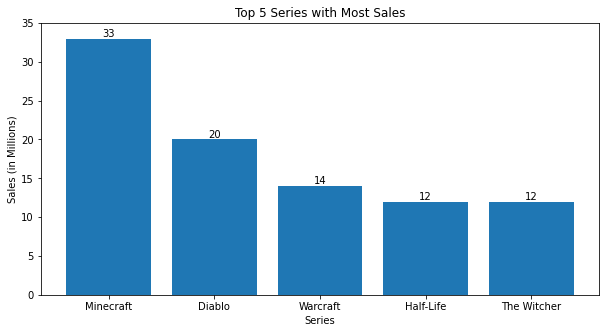

In [ ]:
series = ['Minecraft', 'Diablo', 'Warcraft', 'Half-Life', 'The Witcher']
sales = [33.0, 20.0, 14.0, 12.0, 12.0]

fig, ax = plt.subplots()
bar_container = ax.bar(series, sales)
ax.set(xlabel= 'Series', ylabel='Sales (in Millions)', title='Top 5 Series with Most Sales', ylim=(0, 35))
ax.bar_label(bar_container, fmt='{:,.0f}')

##Series with the Most Games

In [ ]:
df_clean['Series'].value_counts().head(6)

                     36
StarCraft             6
Command & Conquer     5
Age of Empires        4
Civilization          4
Diablo                3
Name: Series, dtype: int64

[Text(0, 0, '6'),
 Text(0, 0, '5'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '3')]

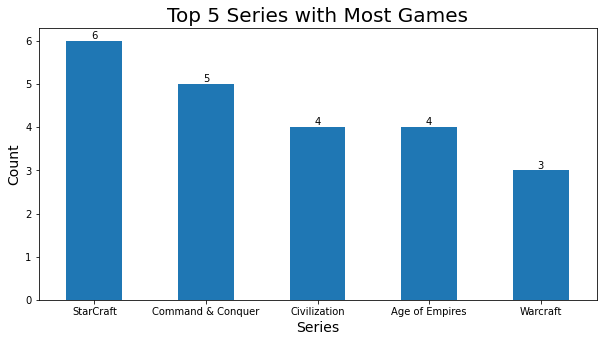

In [ ]:
plt.rcParams['figure.figsize'] = (10,5)
ax = df_clean['Series'].value_counts().head().plot(kind='bar')

plt.title('Top 5 Series with Most Games', fontsize=20)
plt.xlabel('Series', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation='horizontal')

ax.bar_label(ax.containers[0])

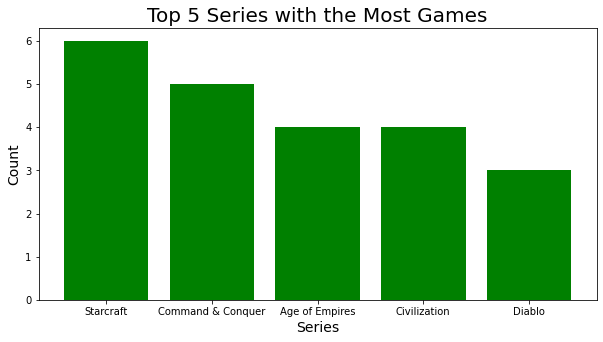

In [ ]:
topseries = {
    'Series' : ['Starcraft', 'Command & Conquer', 'Age of Empires', 'Civilization', 'Diablo'],
    'count' : [6, 5, 4, 4, 3]
}

plt.rcParams['figure.figsize'] = (10,5)
plt.bar('Series', 'count', data = topseries, color = 'green')
plt.title('Top 5 Series with the Most Games', fontsize=20)
plt.xlabel('Series', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()


[Text(0, 0, '33'),
 Text(0, 0, '20'),
 Text(0, 0, '14'),
 Text(0, 0, '12'),
 Text(0, 0, '12')]

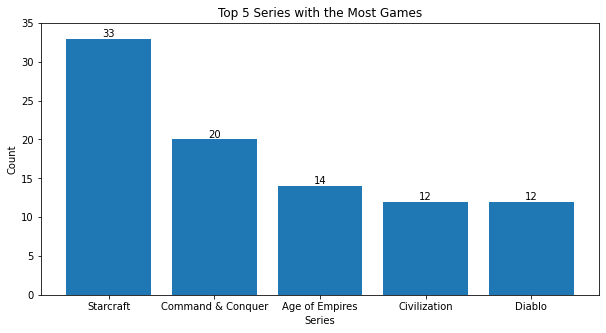

In [ ]:
series = ['Starcraft', 'Command & Conquer', 'Age of Empires', 'Civilization', 'Diablo']
count = [6, 5, 4, 4, 3]

fig, ax = plt.subplots()
bar_container = ax.bar(series, sales)
ax.set(xlabel= 'Series', ylabel='Count', title='Top 5 Series with the Most Games', ylim=(0, 35))
ax.bar_label(bar_container, fmt='{:,.0f}')

## Oldest and Newest Games

In [ ]:
min(df_clean['Release'])


Timestamp('1984-12-01 00:00:00')

In [ ]:
df_clean.loc[df_clean['Release'] == "1984-12-01 00:00:00"]

,Name,Sales,Series,Release,Genre,Developer,Publisher
133,Hydlide,1.0,Hydlide,1984-12-01,Action role-playing,Technology and Entertainment Software,Technology and Entertainment Software


In [ ]:
max(df_clean['Release'])

Timestamp('2021-02-01 00:00:00')

In [ ]:
df_clean.loc[df_clean['Release'] == "2021-02-01 00:00:00"]

,Name,Sales,Series,Release,Genre,Developer,Publisher
20,Valheim,6.0,NaN,2021-02-01,Survival,Iron Gate,Coffee Stain Publishing
